In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Spotify Top 10 2010-2019

In [2]:
top_10_file = "Resources/top10s.csv"

top_10_df = pd.read_csv(top_10_file, encoding='latin1',dtype='unicode')

top_10_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
header = ['Index', 'Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy',
     'Danceability', 'Loudness dB', 'Liveness', 'Valence', 'Length', 'Acousticness','Speechiness', 'Popularity']
top_10_df.columns = header

top_10_df.head()


,Index,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
top_10_df.drop(['Index'], axis=1, inplace=True)
top_10_df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
top_10_df['Popularity'] = pd.to_numeric(top_10_df['Popularity'])

In [6]:
genre_groups = top_10_df.groupby('Genre')
genre_groups['Popularity'].mean().round()

Genre
acoustic pop                 58.0
alaska indie                 36.0
alternative r&b              84.0
art pop                      63.0
atl hip hop                  50.0
australian dance             62.0
australian hip hop           70.0
australian pop               65.0
barbadian pop                65.0
baroque pop                  68.0
belgian edm                  60.0
big room                     66.0
boy band                     70.0
british soul                 62.0
brostep                      86.0
canadian contemporary r&b    78.0
canadian hip hop             74.0
canadian latin               18.0
canadian pop                 72.0
candy pop                    58.0
celtic rock                  80.0
chicago rap                  73.0
colombian pop                56.0
complextro                   67.0
contemporary country         76.0
dance pop                    64.0
danish pop                   80.0
detroit hip hop              74.0
downtempo                    62.0
edm     

In [7]:
genre_groups['Danceability'].max()

Genre
acoustic pop                 55
alaska indie                 51
alternative r&b              90
art pop                      76
atl hip hop                  78
australian dance             67
australian hip hop           91
australian pop               76
barbadian pop                82
baroque pop                  67
belgian edm                  73
big room                     74
boy band                     84
british soul                 73
brostep                      69
canadian contemporary r&b    77
canadian hip hop             79
canadian latin               80
canadian pop                 87
candy pop                    71
celtic rock                  42
chicago rap                  63
colombian pop                80
complextro                   72
contemporary country         47
dance pop                    97
danish pop                   77
detroit hip hop              75
downtempo                    75
edm                          69
electro                      83
el

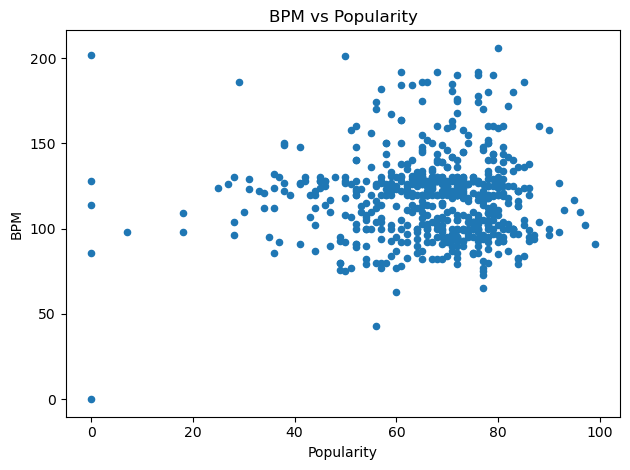

In [8]:
slim = top_10_df[["Popularity","BPM"]].astype(int)
scatter = slim.plot(kind="scatter",x="Popularity",y="BPM")
plt.title('BPM vs Popularity')
plt.tight_layout()
plt.show()

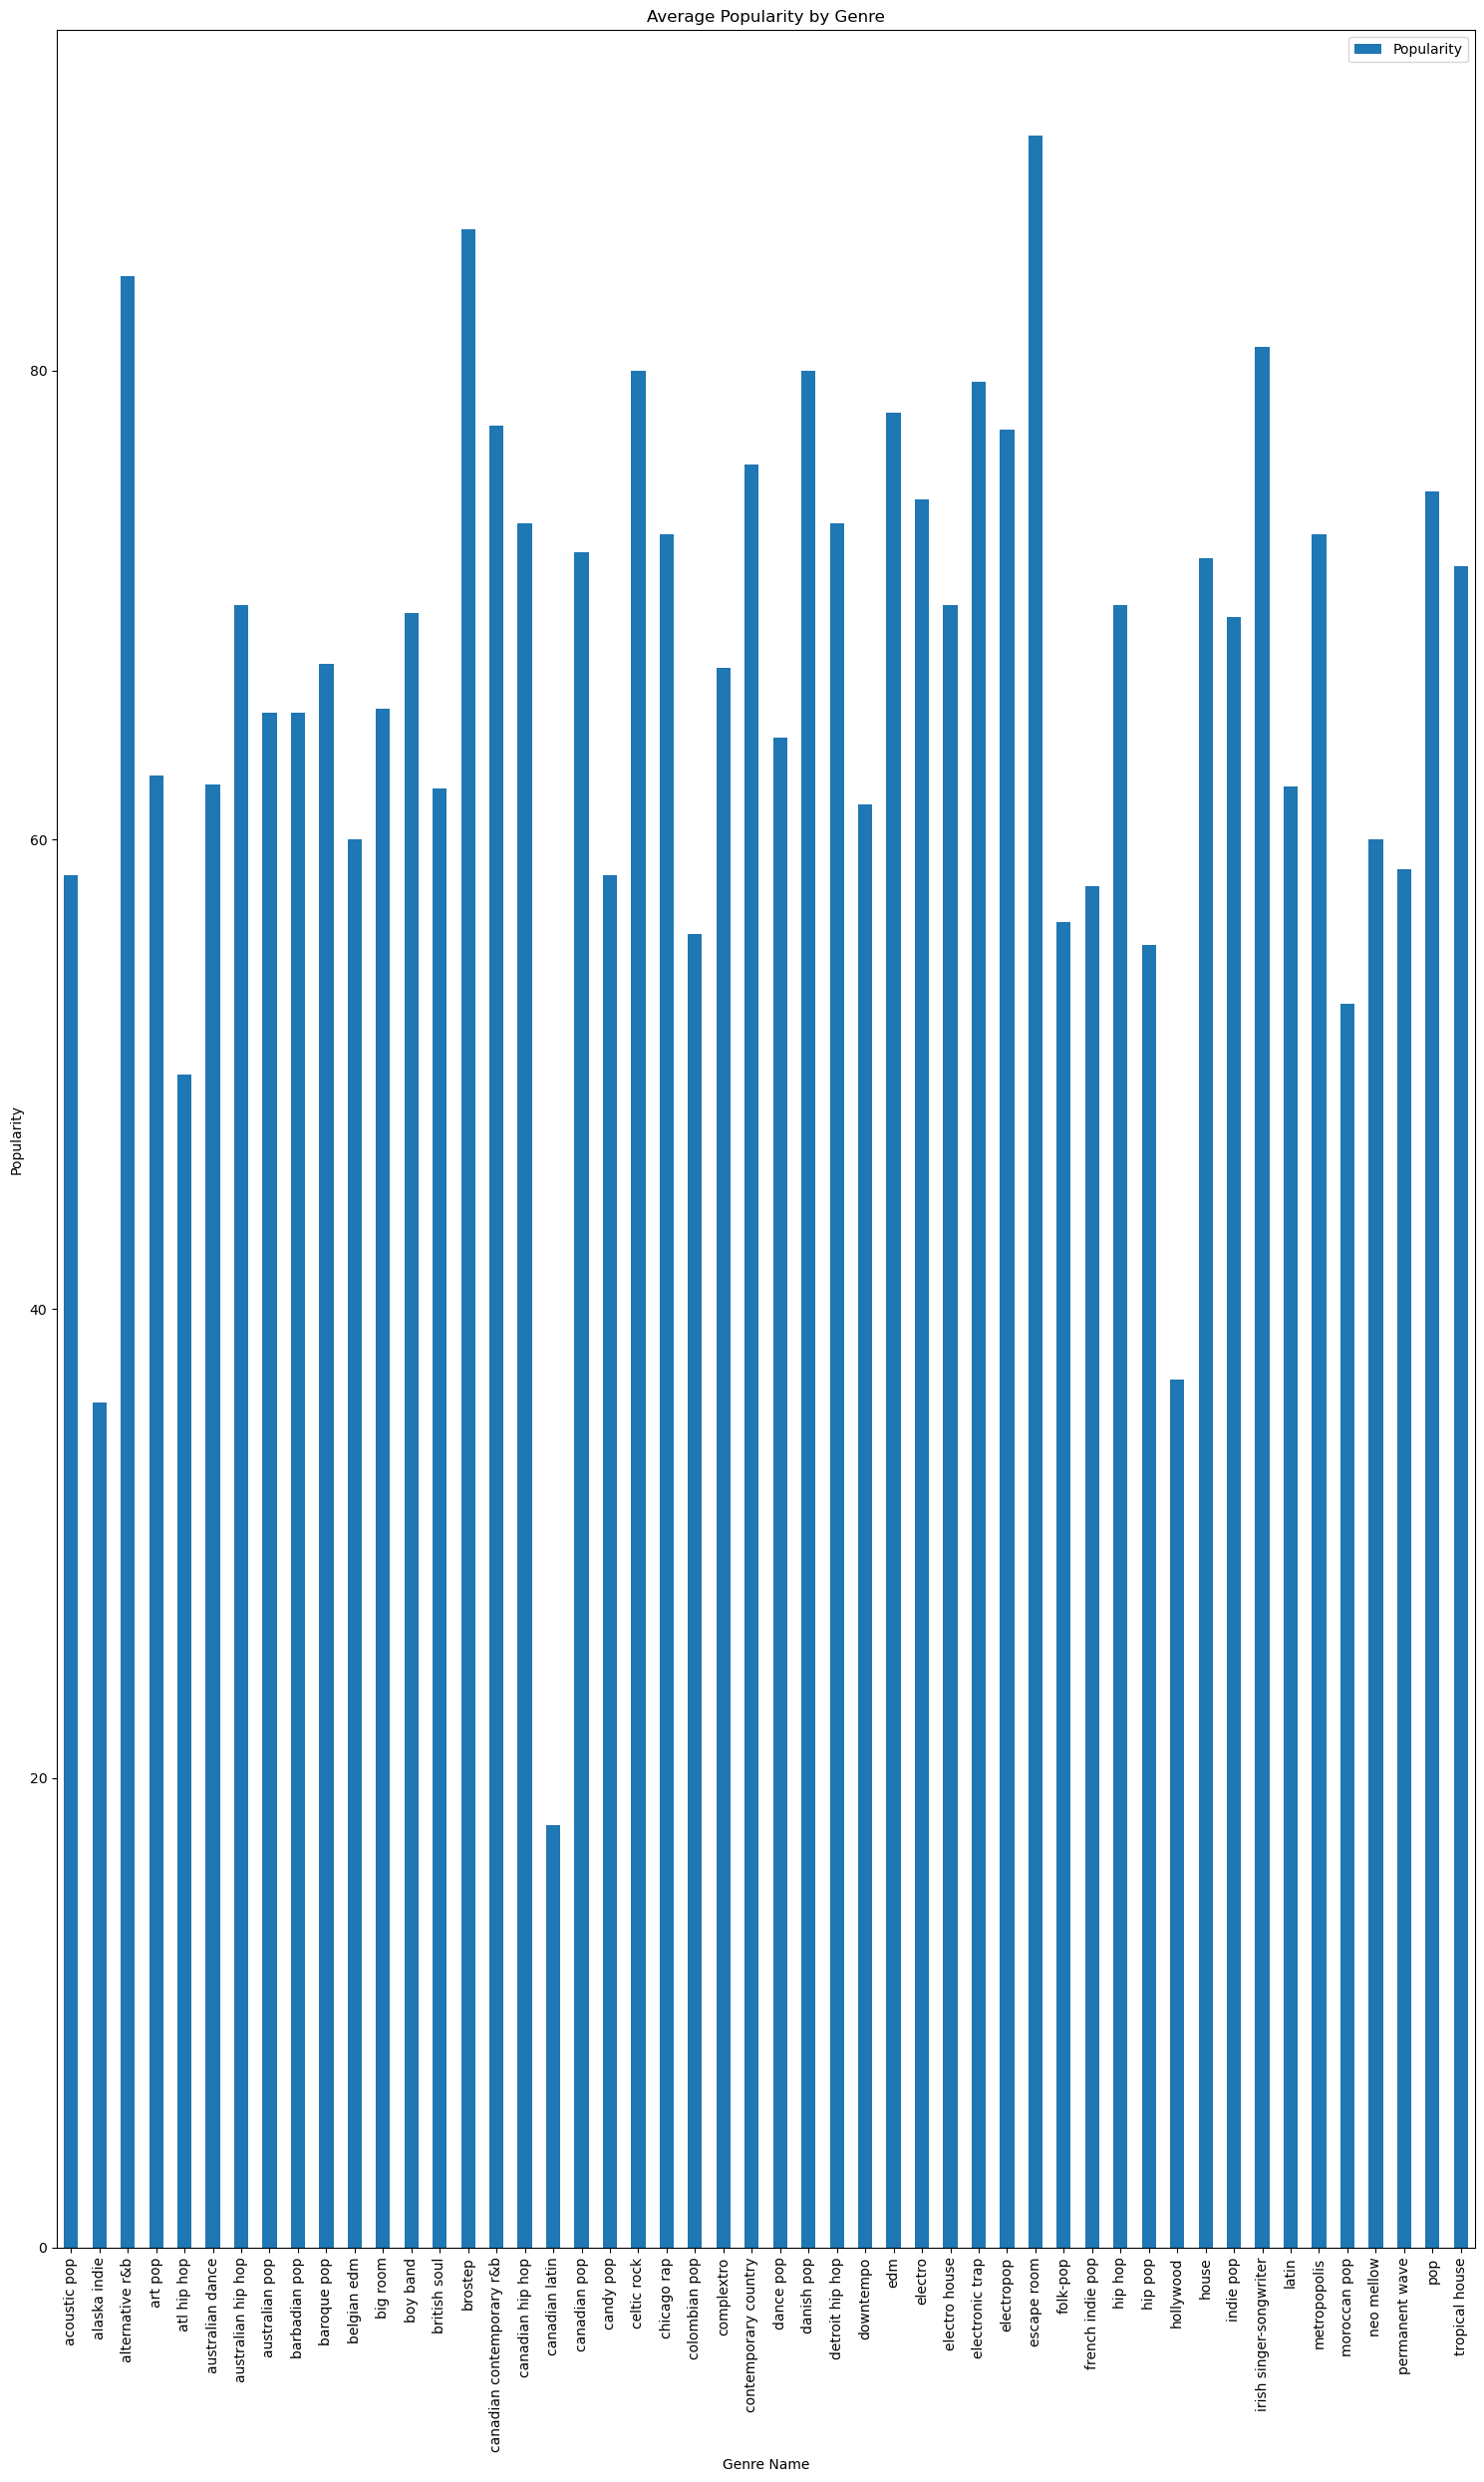

In [9]:
mean_top_10 = top_10_df.groupby("Genre").mean().reset_index()
mean_top_10

bar = mean_top_10.plot(kind="bar",x="Genre",y="Popularity",figsize=(15,25))
plt.title('Average Popularity by Genre')
plt.ylabel('Popularity')
plt.xlabel('Genre Name')
plt.tight_layout()
plt.show()

C:\Users\Steven Hoang\AppData\Local\Temp\ipykernel_4372\1183607654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_popularity["Popularity"] = genre_popularity["Popularity"].astype(float)


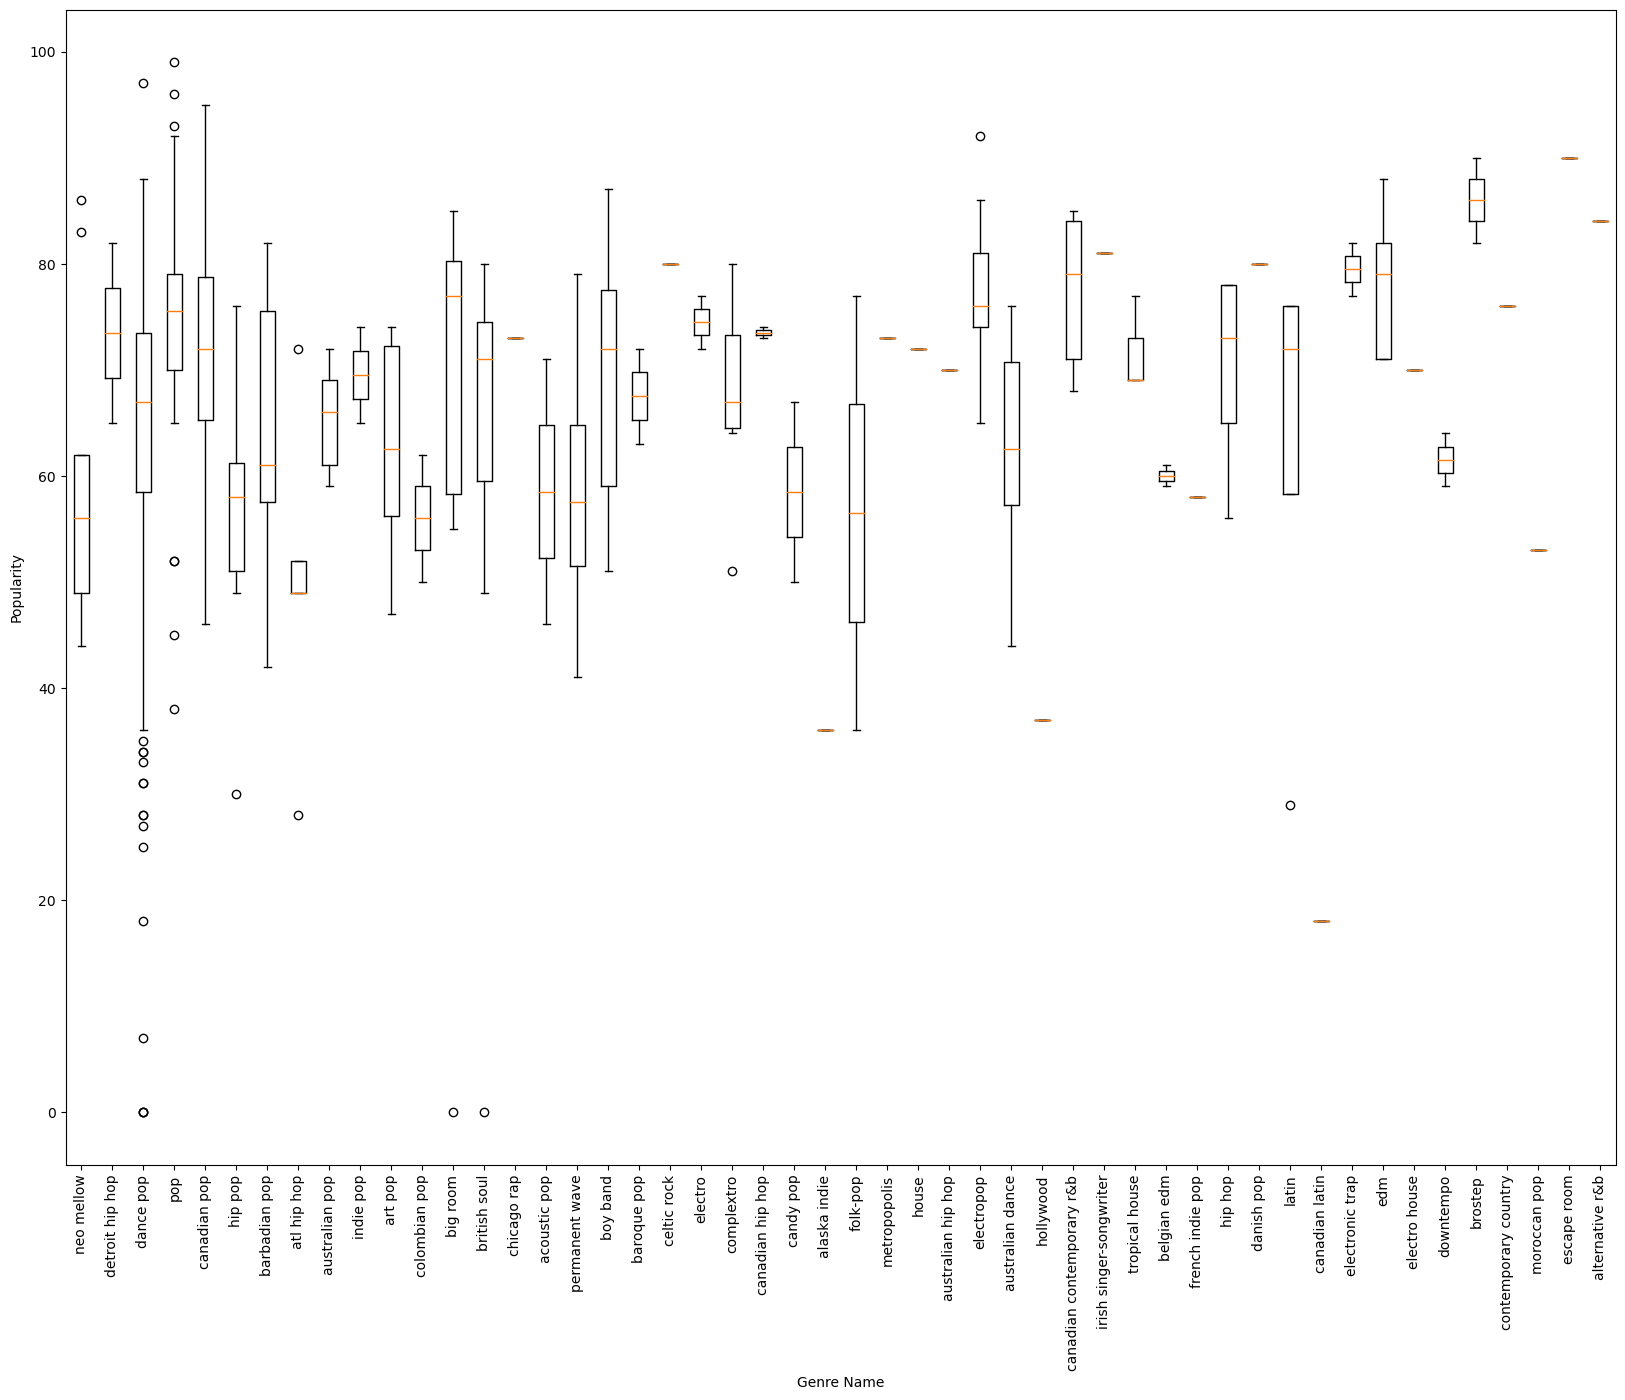

In [10]:
genre_list = list(top_10_df["Genre"].unique())
# print(genre_list)
genre_popularity_list = []
genre_popularity = top_10_df[["Genre","Popularity"]]
genre_popularity["Popularity"] = genre_popularity["Popularity"].astype(float)
genre_popularity_groupby = genre_popularity.groupby("Genre")
genre_popularity_groupby
# print(type(tumor_volume_list[1]))
    # Locate the rows which contain mice on each drug and get the tumor volumes
genre_pop = [genre_popularity[(genre_popularity["Genre"]==x)] for x in genre_list]
# print(genre_pop)
# list(drugs_mice[0]["Tumor Volume (mm3)"])
genre = 0
for x in genre_pop:
    genre_popularity_list.append(list(genre_pop[genre]["Popularity"]))
    genre = genre+1
    # add subset
genre_popularity_list
# genre_popularity_list
# genre_popularity_df = pd.DataFrame(genre_popularity_list)
fig1, ax1 = plt.subplots(figsize=(20, 15))
ax1.set_ylabel("Popularity")
ax1.set_xlabel('Genre Name')
ax1.boxplot(genre_popularity_list)
ax1.set_xticklabels(genre_list)
plt.xticks(rotation = 90)
plt.show()